# Objective

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV 

In [3]:
ads_df = pd.read_csv('C:/Users/Guilherme/Datasets/advertising.csv')

In [4]:
ads_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ads_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis


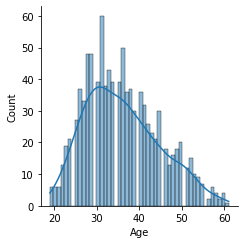

In [7]:
sns.displot(data=ads_df, x='Age', bins=50, kde=True, height=3.5)

Ages range from 18 to 60+ and the distribution is centered around 30 years old. Distribution looks close to normal, but skewed to the right.

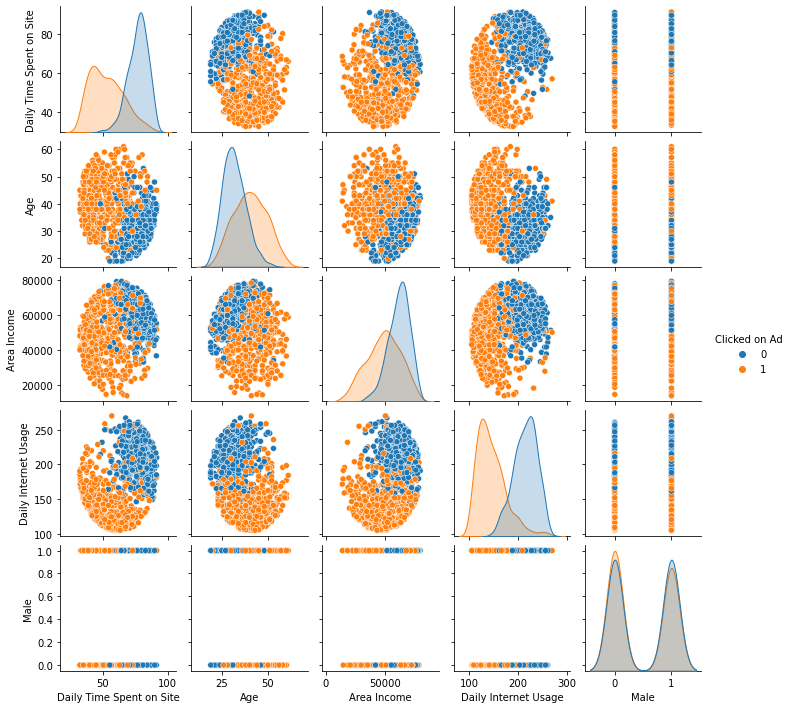

In [9]:
sns.pairplot(data=ads_df, hue='Clicked on Ad', height=2)

From the graphs, it apperas that we can observe a few relationships:

* Daily Time Spent on site: lower time spent seems to be related to higher probability to click on ad
* Age: higher age seems to be related to higher probability to click on ad
* Area income: lower time spent seems to be slightly related to higher probability to click on ad
* Daily Internet Usage: lower time spent seems to be related to higher probability to click on ad
* Male: females seem to be slightly more related to higher probability to click on ad

# Logistic Regression

Now it's time to do a train test split, and train the regression model!

In [10]:
X = ads_df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = ads_df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=55)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

With the model trained, we can make the first prediction.

In [11]:
y_pred = logmodel.predict(X_test)

print('Confusion Matrix:')
print()
print(confusion_matrix(y_test, y_pred))
print()
print('Classification Report:')
print()
print(classification_report(y_test, y_pred))

Confusion Matrix:

[[139   6]
 [ 25 130]]

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       145
           1       0.96      0.84      0.89       155

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



Our model has 90% acurracy with the test data, which is great! It was better in predicting "clicks" (96%) then "not clicks" (85%)

In [13]:
odds = np.exp(logmodel.coef_[0])  
pd.DataFrame(odds, X_test.columns, columns=['coef']).sort_values(by='coef', ascending=False)

,coef
Age,1.303440
Male,1.001174
Area Income,0.999986
Daily Internet Usage,0.976038
Daily Time Spent on Site,0.936867


By looking at the coeficients we can see that they are relatively similar in magnitude, around 1. 


The highest coeficient is Age with a ceoeficient of 1.3. This means that for every one-unit increase in Age, the odds that the observation is in "Clicked on Ad = 1" class are 1.3 times as large as the odds that the observation is not in "Clicked on Ad = 1" class, *when all other variables are held constant.*

Male and Area Income coeficients are tecnicaly 1, which means that they don't really help us predict the observation class.

Internet Usage and Time Spent on site have coeficients below 1, meaning that the higher the values of these features the higher the probability of the observation being on "Clicked on Ad = 0" class.


In [14]:
import warnings
warnings.filterwarnings('ignore') 

In [15]:
grid={"C":np.logspace(-3,3,7), "solver":['lbfgs', 'liblinear'], 'penalty' : ['l1','l2']}
logreg_cv=GridSearchCV(logmodel,grid,cv=5)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.9657142857142859


In [16]:
logmodel = LogisticRegression(C=1000, penalty='l1', solver='liblinear')
logmodel.fit(X_train, y_train)

y_pred = logmodel.predict(X_test)

print('Confusion Matrix:')
print()
print(confusion_matrix(y_test, y_pred))
print()
print('Classification Report:')
print()
print(classification_report(y_test, y_pred))

Confusion Matrix:

[[142   3]
 [  7 148]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       145
           1       0.98      0.95      0.97       155

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [17]:
odds = np.exp(logmodel.coef_[0])  
pd.DataFrame(odds, X_test.columns, columns=['coef']).sort_values(by='coef', ascending=False)

,coef
Age,1.169532
Area Income,0.999928
Daily Internet Usage,0.957825
Male,0.915033
Daily Time Spent on Site,0.883327


# Conclusion

We managed to create a model with 97% accuracy and similar precision for both 0 and 1 classes. 

The feature Age is positively correlated with probability of the observation being of class 1, meaning the higher the age the higher the probability of Cliking on Ad. For Time Spent on Site feature on the other hand, the higher the value the lower the probability of Clicking on Ad.
